## Exploratory Data Analysis

#### Import Necessary Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import DataLoader, DataLoaderSelector

#### Load Dataset

In [15]:
mwr = DataLoaderSelector(data_path='data_th_scale.csv')

#### Dataset Overview

In [16]:
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {mwr.data_loader.data.shape}")
print(f"Columns: {len(mwr.data_loader.data.columns)}")
print("\nColumn names:")
print(mwr.data_loader.data.columns.tolist())

=== DATASET OVERVIEW ===
Dataset shape: (24236, 59)
Columns: 59

Column names:
['Examination ID', 'Conclusion', 'r:Th', 'Weight', 'Height', 'Ambient temperature', 'r:AgeInYears', 'Mammary diameter', 'Cycle', 'Day from the first day', 'Hormonal medications', 'Cancer family history', 'Breast operations', 'Num of pregnancies', 'R1 int', 'L1 int', 'R2 int', 'L2 int', 'R3 int', 'L3 int', 'R4 int', 'L4 int', 'R5 int', 'L5 int', 'R6 int', 'L6 int', 'R7 int', 'L7 int', 'R8 int', 'L8 int', 'R9 int', 'L9 int', 'T1 int', 'T2 int', 'R0 int', 'L0 int', 'R1 sk', 'L1 sk', 'R2 sk', 'L2 sk', 'R3 sk', 'L3 sk', 'R4 sk', 'L4 sk', 'R5 sk', 'L5 sk', 'R6 sk', 'L6 sk', 'R7 sk', 'L7 sk', 'R8 sk', 'L8 sk', 'R9 sk', 'L9 sk', 'T1 sk', 'T2 sk', 'R0 sk', 'L0 sk', 'Conclusion (Tr)']


#### Thermal Asymmetry Distribution


=== THERMAL ASYMMETRY DISTRIBUTION ===
Th scale distribution:
r:Th
0    5845
1    7006
2    7137
3     727
4    1947
5    1574
Name: count, dtype: int64


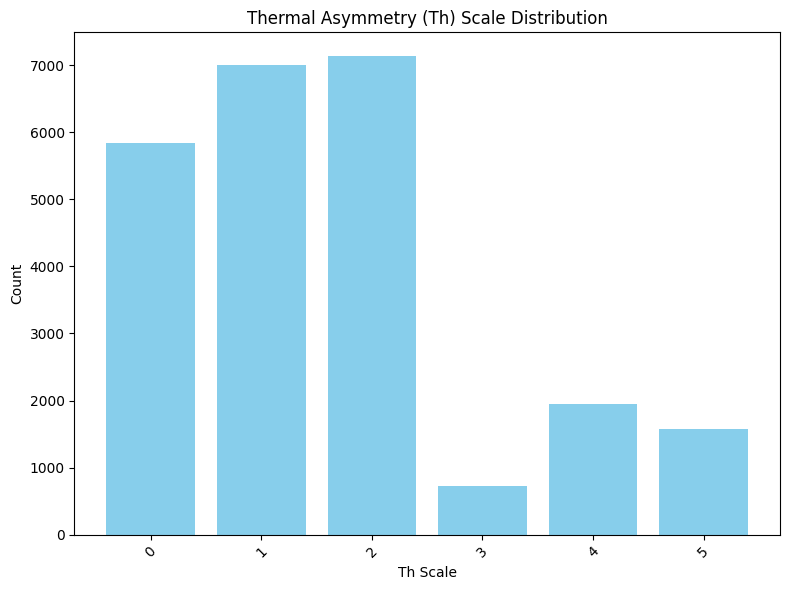

In [19]:
print("\n=== THERMAL ASYMMETRY DISTRIBUTION ===")
print("Th scale distribution:")
print(mwr.data_loader.data['r:Th'].value_counts().sort_index())

th_counts = mwr.data_loader.data['r:Th'].value_counts().sort_index()

# Plot distribution
plt.figure(figsize=(8, 6))
plt.bar(th_counts.index, th_counts.values, color='skyblue')
plt.xlabel('Th Scale')
plt.ylabel('Count')
plt.title('Thermal Asymmetry (Th) Scale Distribution')
plt.xticks(rotation=45)  # if index labels are long
plt.tight_layout()
plt.show()

#### Clinical Text Availability

In [ ]:
print("\n=== CLINICAL TEXT AVAILABILITY ===")
if 'Conclusion (Tr)' in mwr.data_loader.data.columns:
    print("Translated conclusions available:")
    print(f"Total entries: {len(mwr.data_loader.data)}")
    print(f"Non-null text entries: {mwr.data_loader.data['Conclusion (Tr)'].notna().sum()}")
    print(f"Missing text entries: {mwr.data_loader.data['Conclusion (Tr)'].isna().sum()}")
    
    # Show some examples
    print("\nSample clinical descriptions:")
    sample_texts = mwr.data_loader.data['Conclusion (Tr)'].dropna().head(3)
    for i, text in enumerate(sample_texts, 1):
        print(f"{i}. {text}")
else:
    print("No 'Conclusion (Tr)' column found")


=== CLINICAL TEXT AVAILABILITY ===
Translated conclusions available:
Total entries: 24236
Non-null text entries: 24236
Missing text entries: 0

Sample clinical descriptions:
1. The temperature in the area of the mastectomy is slightly higher than in the area of the left breast, but the difference between the deep and superficial values indicates rest or absence of proliferation. In the left breast, at the border of the lower quadrants, there is a typical hardening approximately 5mm in size, which is not thermally active. I recommend monitoring at one-month intervals. Otherwise, a follow-up in 6 months.
2. In the right breast, the temperature is well distributed and does not deviate from the average. In the left breast, a cooler area is visible around the nipple, specifically 0.9 degrees, which is still within normal limits. The left breast is also quite nodular, particularly in the cooler area and at the boundary of the outer quadrants. I recommend self-examination once a month and a 

#### Looking at Processed Data

In [8]:
print("\n=== GETTING PROCESSED DATA ===")
try:
    X, y_class, y_text = mwr.get_data(
        gland='both',
        surface='both', 
        use_ref_values=True,
        use_axillary_values=True,
        use_age=False,
        text_column='Conclusion (Tr)'
    )
    
    print(f"Features (X) shape: {X.shape}")
    print(f"Classification labels (y_class) shape: {y_class.shape}")
    print(f"Text labels (y_text) shape: {y_text.shape}")
    
    print(f"\nFeature columns ({len(X.columns)}):")
    print(X.columns.tolist())
    
    print(f"\nSample feature values (first patient):")
    print(X.iloc[0].head(10))
    
except Exception as e:
    print(f"Error getting data: {e}")


=== GETTING PROCESSED DATA ===
Features (X) shape: (24236, 48)
Classification labels (y_class) shape: (24236,)
Text labels (y_text) shape: (24236,)

Feature columns (48):
['L0 int', 'L1 int', 'L2 int', 'L3 int', 'L4 int', 'L5 int', 'L6 int', 'L7 int', 'L8 int', 'L9 int', 'R0 int', 'R1 int', 'R2 int', 'R3 int', 'R4 int', 'R5 int', 'R6 int', 'R7 int', 'R8 int', 'R9 int', 'L0 sk', 'L1 sk', 'L2 sk', 'L3 sk', 'L4 sk', 'L5 sk', 'L6 sk', 'L7 sk', 'L8 sk', 'L9 sk', 'R0 sk', 'R1 sk', 'R2 sk', 'R3 sk', 'R4 sk', 'R5 sk', 'R6 sk', 'R7 sk', 'R8 sk', 'R9 sk', 'L9 int', 'R9 int', 'L9 sk', 'R9 sk', 'T1 int', 'T2 int', 'T1 sk', 'T2 sk']

Sample feature values (first patient):
L0 int    34.7
L1 int    35.2
L2 int    35.3
L3 int    35.1
L4 int    34.8
L5 int    35.3
L6 int    35.4
L7 int    35.3
L8 int    34.9
L9 int    35.0
Name: 0, dtype: float64


#### Data Quality Check

In [10]:
print("\n=== DATA QUALITY CHECK ===")
print("Missing values in features:")
print(X.isnull().sum().sum())
print("Missing values in classification labels:")
print(y_class.isnull().sum())
print("Missing values in text labels:")
print(y_text.isnull().sum())


=== DATA QUALITY CHECK ===
Missing values in features:
0
Missing values in classification labels:
0
Missing values in text labels:
0


#### Temperature Statistics


=== TEMPERATURE STATISTICS ===
Temperature feature range:
Min: 23.20°C
Max: 42.00°C
Mean: 33.88°C


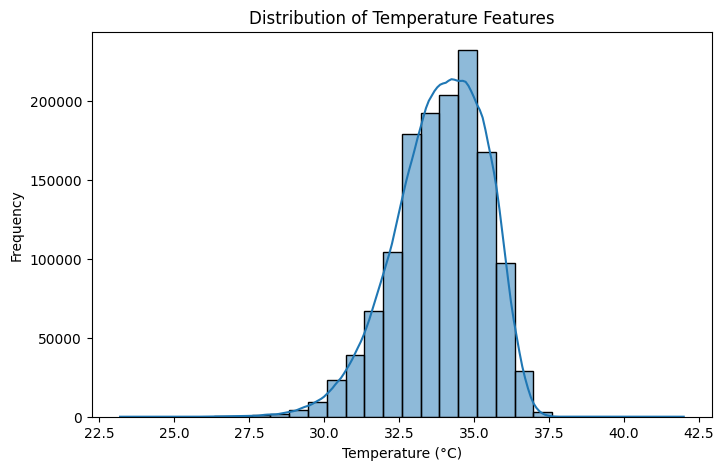

In [22]:
print("\n=== TEMPERATURE STATISTICS ===")
temp_cols = [col for col in X.columns if any(x in col for x in ['int', 'sk'])]
print(f"Temperature feature range:")
print(f"Min: {X[temp_cols].min().min():.2f}°C")
print(f"Max: {X[temp_cols].max().max():.2f}°C")
print(f"Mean: {X[temp_cols].mean().mean():.2f}°C")

# Flatten all temperature values into one series
all_temps = X[temp_cols].values.flatten()

plt.figure(figsize=(8,5))
sns.histplot(all_temps, bins=30, kde=True)
plt.title("Distribution of Temperature Features")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()